# First Thing First:

## What Question do we need to answer?

Business Goals

Find drivers for customer churn at Telco. Why are customers churning?

Construct a ML classification model that accurately predicts customer churn.

Deliver a report that a non-data scientist can read through and understand what steps were taken, why and what was the outcome?

# Project Outline
1. acquire, prep and clean TELCO data set. 
    b. create a data dictionary
    c. Split into train, validate, test sets.
    d. create an encoded data set, and retain an unencoded set.
2. perform exploratory analysis on the unencoded data set
        i. set hypotheses
        ii. demonstrate graphically
        iii. run statistical testing on related variables/variables of interest driving churn
        iv. document takeaways
3. modeling:
    a. pick the appropriate model: decision tree, random forest, KNN or logistic regression. All are classifiers
    b. fit, train and test models.
    c. Pick highest performing models (30 to run on validate set
    d. Run the highest performing model on the test data

## 1. Acquire/Prep/Clean/Split

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

import acquire
import prepare
import split

In [2]:
#acquire the data
df = acquire.get_telco_data()
df = prepare.prep_telco(df)
df.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL


In [3]:
df.shape

(7032, 21)

In [4]:
df.isna().sum()

customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
payment_type             0
internet_service_type    0
dtype: int64

In [5]:
# create an encoded df for modeling
encoded_df = prepare.encode_telco(df)
encoded_df.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,0,...,1,1,1,0,0,0,1,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,0,...,0,1,1,0,0,0,0,1,1,0


In [6]:
encoded_df.shape

(7032, 32)

In [7]:
#Now split for exploratory data analysis (unencoded dataframe), and modeling (encoded dataframe)

In [8]:
train, validate, test = split.train_validate_test_split(df, 'churn')
train.churn.value_counts(), validate.churn.value_counts(), test.churn.value_counts()

(No     2891
 Yes    1046
 Name: churn, dtype: int64,
 No     1239
 Yes     449
 Name: churn, dtype: int64,
 No     1033
 Yes     374
 Name: churn, dtype: int64)

In [9]:
encoded_train, encoded_validate, encoded_test = split.train_validate_test_split(encoded_df, "churn_Yes")

In [10]:
encoded_train.churn_Yes.value_counts(), encoded_validate.churn_Yes.value_counts(), encoded_test.churn_Yes.value_counts()

(0    2891
 1    1046
 Name: churn_Yes, dtype: int64,
 0    1239
 1     449
 Name: churn_Yes, dtype: int64,
 0    1033
 1     374
 Name: churn_Yes, dtype: int64)

## 2. Exploratory Data Analysis

### - The Process of EDA:

    1. Hypothesize: Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable). You can do this in the form of questions in a natural language (as opposed to "statistical" language).

    2. Visualize: use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

    3. Test your hypotheses when visualization isn't immediately clear. Use the appropriate statistical tests (t-tests, correlation, chi-square)
    
### Variables to explore and hypotheses:

    1. Churn: Payment Type (Cat/Cat)
    2. Churn: Total Charges (Cat/Cont)
    3. Churn: Monthly Charges (Cat/Cont)
    4. Churn: Dependents (Cat/Cat)
    5. Churn: Senior Citizen (Cat/Cat)
    6. Churn: Tenure (Cat/Cont)
    7. Churn: Gender (Cat/Cat)
    8. Churn: Internet Service (Cat/Cat)
    9. Churn: Contract Type

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3937 non-null   object 
 1   gender                 3937 non-null   object 
 2   senior_citizen         3937 non-null   int64  
 3   partner                3937 non-null   object 
 4   dependents             3937 non-null   object 
 5   tenure                 3937 non-null   int64  
 6   phone_service          3937 non-null   object 
 7   multiple_lines         3937 non-null   object 
 8   online_security        3937 non-null   object 
 9   online_backup          3937 non-null   object 
 10  device_protection      3937 non-null   object 
 11  tech_support           3937 non-null   object 
 12  streaming_tv           3937 non-null   object 
 13  streaming_movies       3937 non-null   object 
 14  paperless_billing      3937 non-null   object 
 15  m

In [12]:
# Visualize distributions for quantitative columns
#QUANT COLS
quant_col = train.select_dtypes(['int64', 'float64']).columns

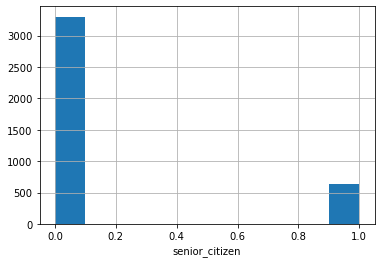

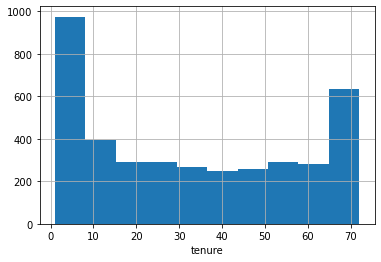

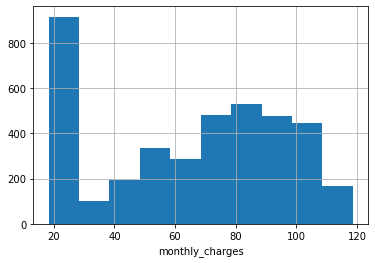

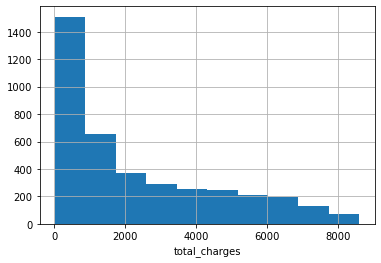

In [13]:
for col in quant_col:
    train[col].hist()
    plt.xlabel(col)
    plt.show()

In [16]:
# Visualize distributions for categorical columns
#CAT COLS
cat_col = train.select_dtypes(['object']).columns

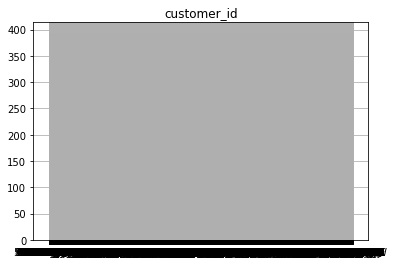

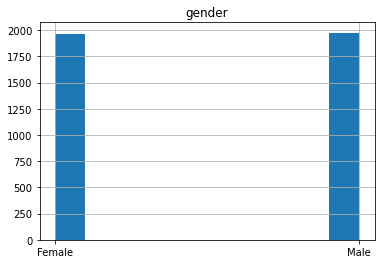

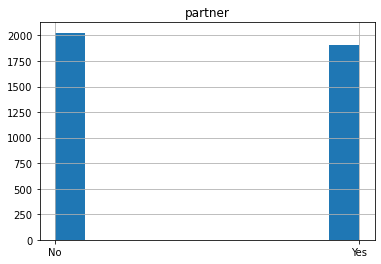

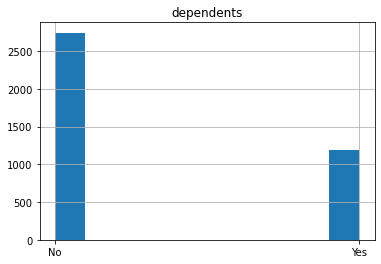

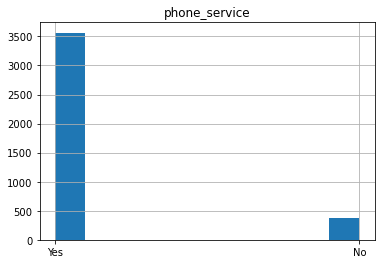

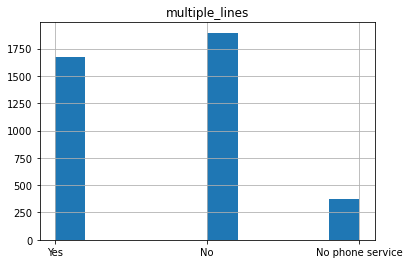

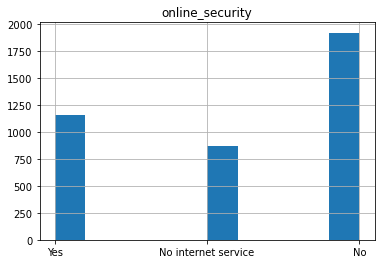

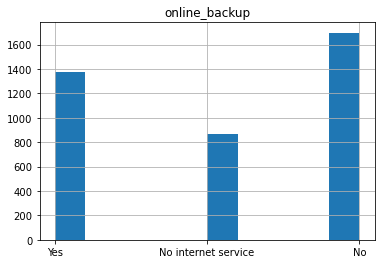

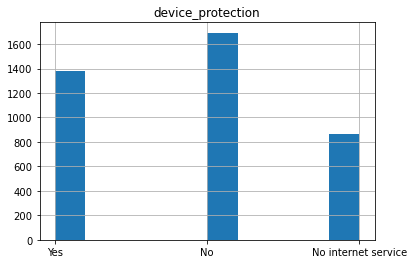

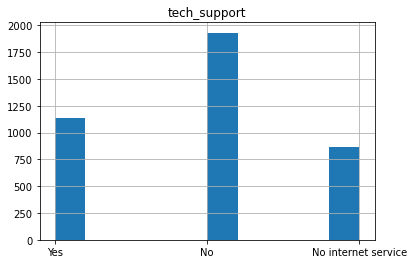

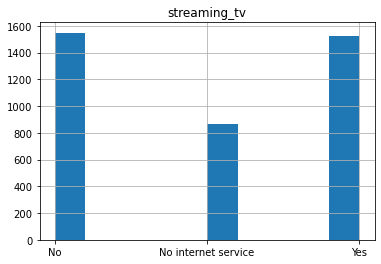

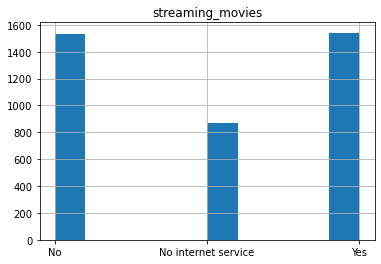

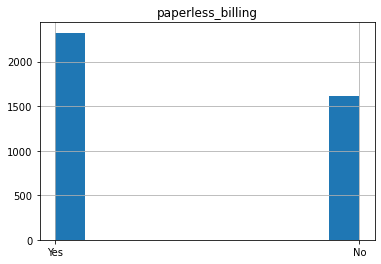

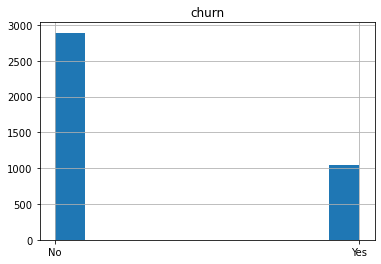

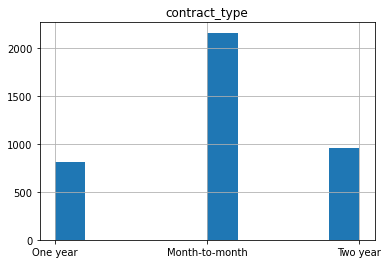

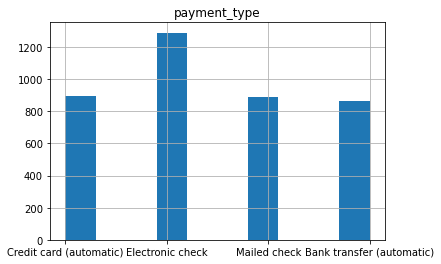

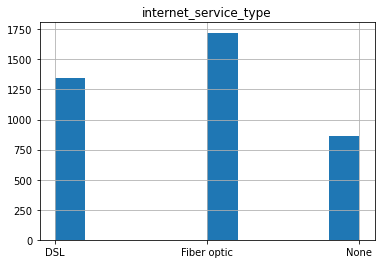

In [18]:
for col in cat_col:
    train[col].hist()
    plt.title(col)
    plt.show()

## Univariate STATS Takeaways:
 - CATEGORICAL DATA
 - Senior citizens: not a large segment of the customer base
 - tenure: most common is 0 months and 70 months >> influx due to a campaign?
 - monthly charges: most common is 20$, then an approx normal dist from 30-120
 - total charges: $0 is the most common, suggesting influx of new customers
 
 - QUANTITATIVE DATA
 - evenly distributed by gender
 - fairly evenly distributed by partner
 - most do not have dependents
 - most have phone service
 - most phone customers have a single line, about 40% have multiple lines
 - most customers have either no online security, or no internet service. About 30% have security
 - similar proportions for online backups
 - churn is about 25% of customers
 - month-to-month contracts are more popluar than one- and two-year contracts combined

TypeError: Neither the `x` nor `y` variable appears to be numeric.

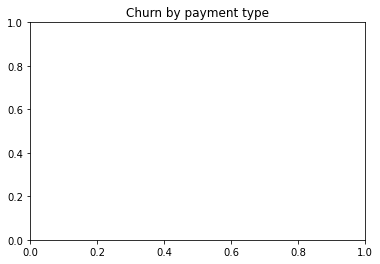

In [20]:
train = train.churn.map(index={'No': 0, 'Yes': 1 })


plt.title("Churn by payment type")
sns.barplot(x=train.payment_type, y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")

<Figure size 1800x1080 with 0 Axes>

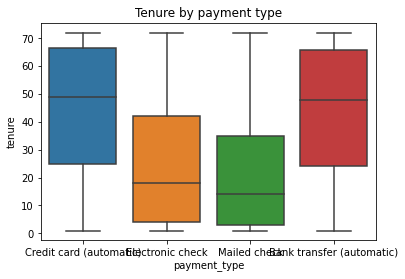

<Figure size 1800x1080 with 0 Axes>

In [21]:
plt.title("Tenure by payment type")
sns.boxplot(x=train.payment_type, y=train.tenure, data=train)
plt.figure(figsize=(25,15))

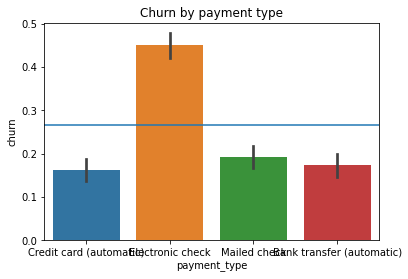

In [64]:
plt.title("Churn by payment type")
sns.barplot(x="payment_type", y="churn", data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="population avg churn")

In [74]:
# If the visual was unclear or we need more confirmation, run a hypothesis test
# Let's run a chi squared to compare proportions
alpha = 0.05
null_hypothesis = "churn and payment type are independent"
alternative_hypothesis = "there is a relationship between churn and payment type"

# Setup a crosstab of observed churn to payment type
observed = pd.crosstab(train.churn, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"P is equal to: {p}")

Reject the null hypothesis that churn and payment type are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment type
P is equal to: 4.64358817076333e-73


<AxesSubplot:title={'center':'Tenure by payment type'}, xlabel='total_charges', ylabel='tenure'>

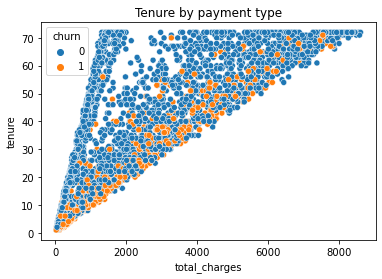

In [56]:
plt.title("Tenure by payment type")
sns.scatterplot(x=train.total_charges, y=train.tenure, data=train, hue=train.churn)

### Project Due Outs
1. Clean data
2. Data dictionary
3. Split data sets: Encoded/Unencoded for Train, Test and Validate